 # K- Means Clustering

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets, svm 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

c:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

In [6]:
headers=[x for x in range(0,23)]
wine.columns=headers
print(len(wine))

8123


In [7]:
wine.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
5469,p,x,s,w,t,f,f,c,b,w,...,s,w,w,p,w,o,p,h,s,g
2887,e,f,y,e,t,n,f,c,b,w,...,s,p,p,p,w,o,p,k,v,d
2019,e,x,f,n,t,n,f,c,b,u,...,s,w,w,p,w,o,p,n,y,d


#### This dataset tells in which country the engine of the car was made depending on the attributes shown above

#### Normalizing the dataset

In [9]:
# col=['free sulfur dioxide','total sulfur dioxide']

In [10]:
# for i in col:
#     wine[i]=(wine[i]-wine[i].min())/(wine[i].max()-wine[i].min())
    

In [20]:
encoder=LabelEncoder()
for i in wine:
    wine[i]=encoder.fit_transform(wine[i])


In [21]:
wine.sample()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1365,0,5,0,3,0,5,1,1,0,5,...,0,7,7,0,2,1,0,2,0,1


In [22]:
features=wine.columns[:-1]
target=wine.columns[-1]

Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [23]:
features

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21],
           dtype='int64')

In [24]:
target

22

In [25]:
train,test=train_test_split(wine,test_size=0.2)

In [26]:
len(train)

6498

In [27]:
len(test)

1625

In [28]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(train[features], train[target])
    predicted=model.predict(test[features])
    acc = accuracy_score(test[target],predicted)*100
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

64.55384615384615 % accuracy obtained with kernel = linear
57.723076923076924 % accuracy obtained with kernel = poly
61.353846153846156 % accuracy obtained with kernel = rbf


# Visualize the decision boundaries

In [39]:
features=[21,22]
# the features are Horsepower and acceleration 

In [44]:
deg=5

In [45]:
svc = svm.SVC(kernel='linear').fit(train[features],train[target] )
rbf_svc = svm.SVC(kernel='rbf', gamma=0.8).fit(train[features], train[target])
poly_svc = svm.SVC(kernel='poly', degree=deg).fit(train[features], train[target])

In [46]:
#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = wine[features[0]].min() - 1, wine[features[0]].max() + 1
y_min, y_max = wine[features[1]].min() - 1, wine[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

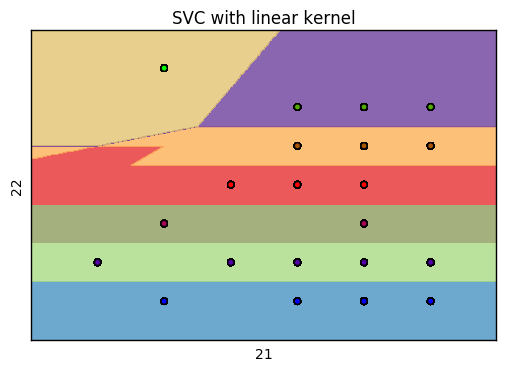

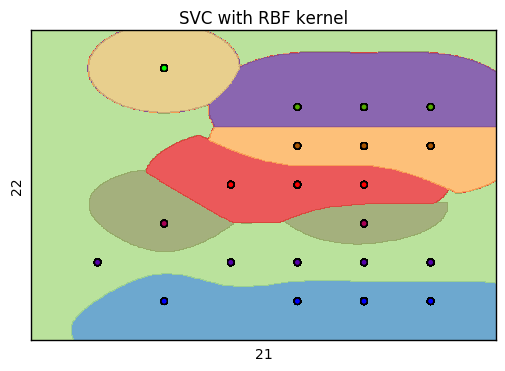

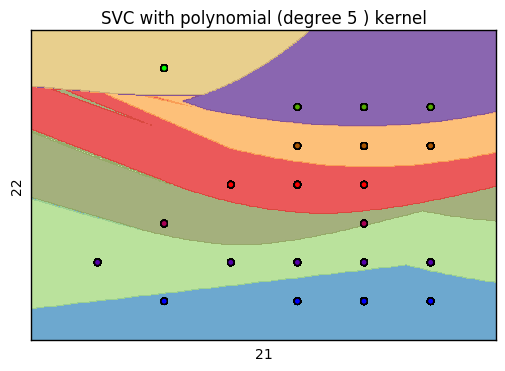

In [47]:
#Define title for the plots
string='SVC with polynomial (degree '+str(deg) +' ) kernel'
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
           string]


for i, model in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel returns continuous flaten array

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    #cmap stands for color map you can also make it to None

    
    
    # Plot also the training points
    plt.scatter(wine[features[0]], wine[features[1]], c=wine[target], cmap=plt.cm.brg)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### The dataset is not properly classified using RBF and poly with kernel 4

In [ ]:
#Checking the support vectors of the linear kernel
print("The support vectors for linear kernel are:\n", svc.support_vectors_)
print()
print()

#Checking the support vectors of the rbf kernel
print("The support vectors for radial basis function are:\n", rbf_svc.support_vectors_)
print()
print()

#Checking the support vectors of the polynomial kernel (for example)
print("The support vectors for polynomial kernel are:\n", poly_svc.support_vectors_)
